# LVDT Position Simulation Plots
### Analyse the position measurement of a reversed LVDT with geometry as used in ETpathfinder large IP. 

#### Import everything

In [1]:
import numpy as np
import cmath
import scipy.optimize as opt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Read in data
[0] = positions, 
[1] = upper outer coil,
[2] = lower outer coil, 
[3] = inner coil
[4] = meta data: NSteps, StepSize, OutCoil_Current

In [2]:
files = ['RevLVDT_Position_ETpf_LIP_10kHz_20mA_32AWG.out',
         'NPResults_RevLVDT_FEMM_10kHz_Move_MiddCoil+Magnet_ETpfLVDT.txt']

legends = ['pyFEMM',
           'standalone FEMM']

inputdata = []
NSteps = []
StepSize = []
OutCoil_Current = []

for i in range(0,len(files)):
    inputarray = np.loadtxt(files[i], dtype=complex)
    inputdata.append(inputarray)
    NSteps.append(int(inputarray[4][0].real))
    StepSize.append(inputarray[4][1].real)
    OutCoil_Current.append(inputarray[4][2].real) 

print(inputdata)
print(NSteps)
print(StepSize)
print(OutCoil_Current)

[array([[-5.00000000e+00+0.00000000e+00j, -4.00000000e+00+0.00000000e+00j,
        -3.00000000e+00+0.00000000e+00j, -2.00000000e+00+0.00000000e+00j,
        -1.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  2.00000000e+00+0.00000000e+00j,
         3.00000000e+00+0.00000000e+00j,  4.00000000e+00+0.00000000e+00j,
         5.00000000e+00+0.00000000e+00j],
       [ 7.26533528e-01+1.19373246e+01j,  7.26794391e-01+1.19373416e+01j,
         7.27072337e-01+1.19373896e+01j,  7.27367032e-01+1.19374178e+01j,
         7.27677686e-01+1.19374206e+01j,  7.28003435e-01+1.19374554e+01j,
         7.28343245e-01+1.19374795e+01j,  7.28695905e-01+1.19375195e+01j,
         7.29059884e-01+1.19375305e+01j,  7.29433671e-01+1.19375510e+01j,
         7.29815511e-01+1.19375933e+01j],
       [-7.29815410e-01-1.19376692e+01j, -7.29433605e-01-1.19376704e+01j,
        -7.29059880e-01-1.19376113e+01j, -7.28695888e-01-1.19375658e+01j,
        -7.28343239e-01-1.1

#### Analyse and plot output data
Basic plots:

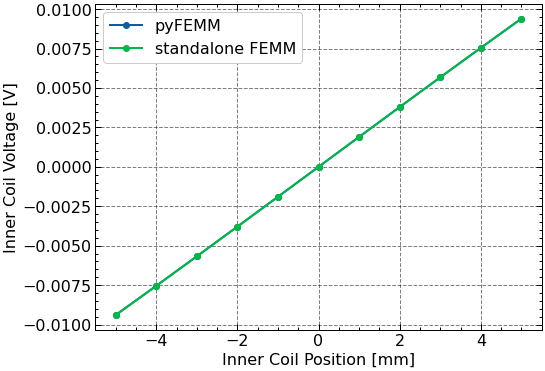

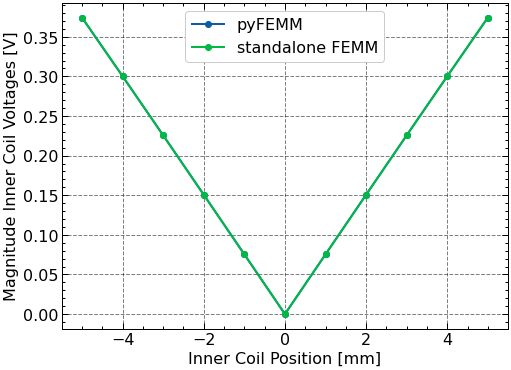

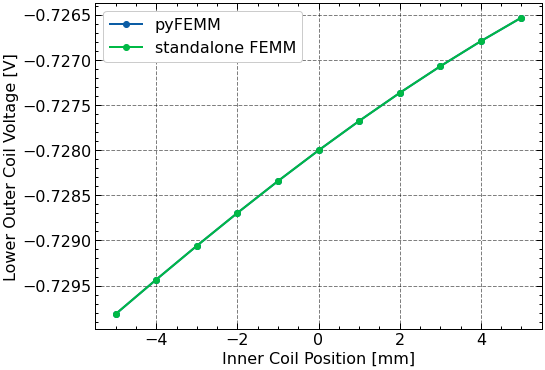

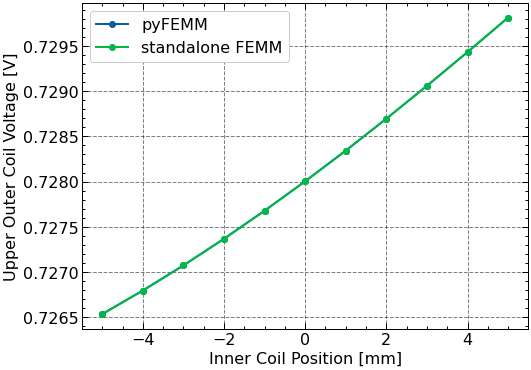

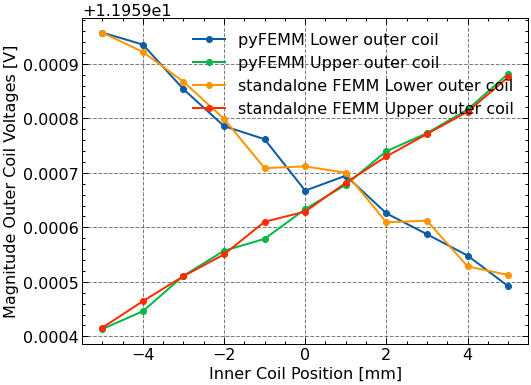

Phase offset: 0.03594790589228247 0.0359458451179564
Phase offset: 0.0359495126124707 0.03594522673627765


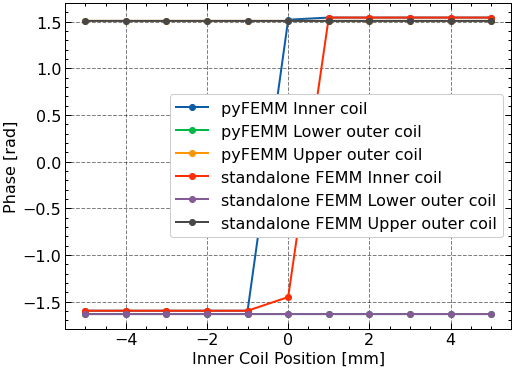

In [3]:
#print(plt.style.available)
plt.style.use(['science','grid','notebook'])

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][3].real, 'o-', label=legends[i])
plt.ylabel('Inner Coil Voltage [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], abs(inputdata[i][3]), 'o-', label=legends[i])
plt.ylabel('Magnitude Inner Coil Voltages [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][2].real, 'o-', label=legends[i])
plt.ylabel('Lower Outer Coil Voltage [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][1].real, 'o-', label=legends[i])
plt.ylabel('Upper Outer Coil Voltage [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], abs(inputdata[i][2]), 'o-', label=legends[i] + " Lower outer coil")
    plt.plot(inputdata[i][0], abs(inputdata[i][1]), 'o-', label=legends[i] + " Upper outer coil")
plt.ylabel('Magnitude Outer Coil Voltages [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(frameon=False)
plt.show()

InnCoil_Phases = []
LowOutCoil_Phases = []
UppOutCoil_Phases = []
for i in range(0,len(files)):
    InnCoil_Phases.append(np.angle(inputdata[i][3]))
    LowOutCoil_Phases.append(np.angle(inputdata[i][2]))
    UppOutCoil_Phases.append(np.angle(inputdata[i][1]))
    
for i in range(0,len(files)):    
    print("Phase offset:", InnCoil_Phases[i][0] - LowOutCoil_Phases[i][0], InnCoil_Phases[i][NSteps[i]] - UppOutCoil_Phases[i][NSteps[i]])
    plt.plot(inputdata[i][0], InnCoil_Phases[i], 'o-', label=legends[i] + " Inner coil")
    plt.plot(inputdata[i][0], LowOutCoil_Phases[i], 'o-', label=legends[i] + " Lower outer coil")
    plt.plot(inputdata[i][0], UppOutCoil_Phases[i], 'o-', label=legends[i] + " Upper outer coil")
plt.ylabel('Phase [rad]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

Create normalised response of inner coil in V/mmA with magnitude of complex numbers.
flip sign based on phase of signal and fit to check linearity.

Fitted slope of the function: 3.750786763239209
Fitted slope of the function: 3.750738515303789


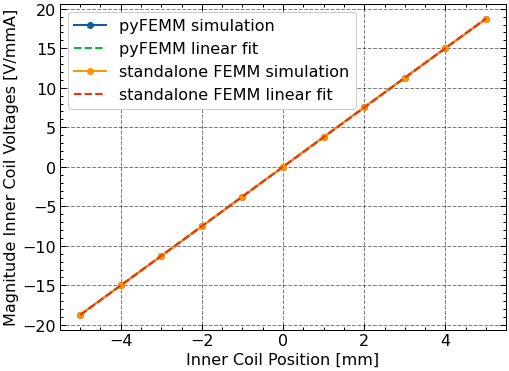

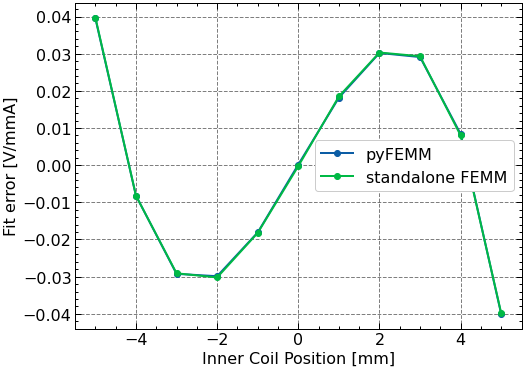

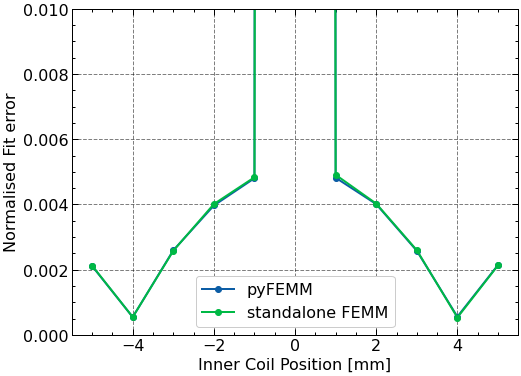

In [4]:
def linfunc(x, a, b):
     return a*x + b

Norm_InnCoil_Signals = []
fitted_Norm_InnCoil_Signals = []

for i in range(0,len(files)):
    Norm_InnCoil_Signals.append(abs(inputdata[i][3])/StepSize[i]/OutCoil_Current[i]) 
    for j in range(0,NSteps[i]+1):
        if InnCoil_Phases[i][j] < 0.0: Norm_InnCoil_Signals[i][j] *= -1
    optimizedParameters, pcov = opt.curve_fit(linfunc, inputdata[i][0], Norm_InnCoil_Signals[i])
    print("Fitted slope of the function:",optimizedParameters[0])
    fitted_Norm_InnCoil_Signals.append(linfunc(inputdata[i][0], *optimizedParameters))
    plt.plot(inputdata[i][0], Norm_InnCoil_Signals[i], 'o-', label=legends[i] + " simulation")
    plt.plot(inputdata[i][0], fitted_Norm_InnCoil_Signals[i], '--', label=legends[i] + " linear fit")

plt.ylabel('Magnitude Inner Coil Voltages [V/mmA]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], Norm_InnCoil_Signals[i] - fitted_Norm_InnCoil_Signals[i], 'o-', label=legends[i])
plt.ylabel('Fit error [V/mmA]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], abs(Norm_InnCoil_Signals[i] - fitted_Norm_InnCoil_Signals[i])/abs(Norm_InnCoil_Signals[i]), 'o-', label=legends[i])
plt.ylabel('Normalised Fit error')
plt.xlabel('Inner Coil Position [mm]')
plt.ylim(0.0,0.01)
plt.legend()
plt.show()